# matplotlib 기본 plot

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1-1. plot() 기본 예제

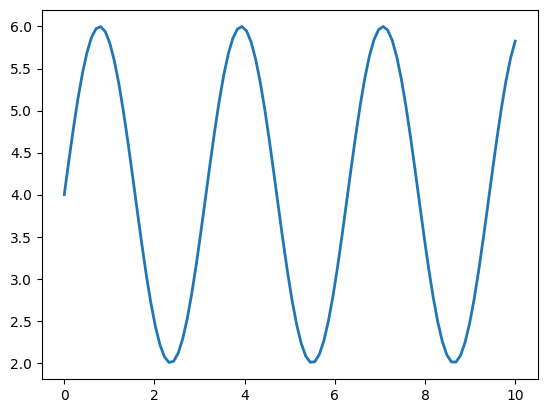

In [6]:
# 데이터 생성
x = np.linspace(0,10,100)  # 0~10사이 100등분
y = 4 + 2 * np.sin(2*x)

# plot 그리기
fig, ax = plt.subplots()

ax.plot(x,y, linewidth = 2.0) # 선두께



In [7]:
# 데이터 로딩
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
ad = pd.read_csv('/content/drive/MyDrive/mulcam_bigdata/data/Advertising.csv')

In [9]:
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


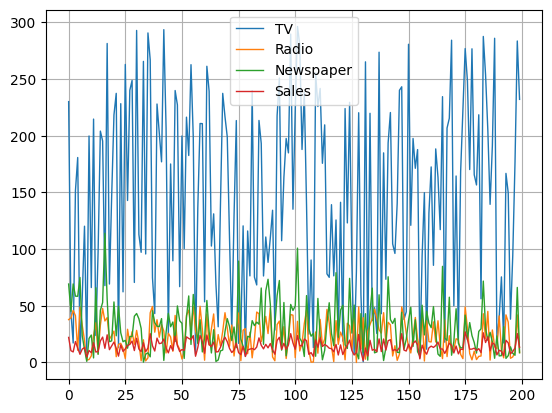

In [10]:
# 데이터 생성
tv = ad["TV"]
radio = ad["Radio"]
news = ad["Newspaper"]
sales = ad["Sales"]

# plot
fig, ax = plt.subplots()

ax.plot(tv, linewidth=1.0)
ax.plot(radio, linewidth=1.0)
ax.plot(news, linewidth=1.0)
ax.plot(sales, linewidth=1.0)
plt.legend(["TV", "Radio", "Newspaper", "Sales"])
plt.grid()

plt.show()

2-1. scatter() 기본 예제

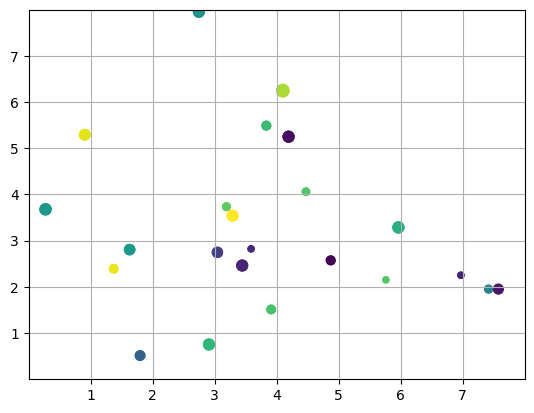

In [11]:
# 데이터 생성
np.random.seed(3)
x = 4 + np.random.normal(0,2,24)  # 정규분포(평균, 표준편차, 생성할 갯수)
y = 4 + np.random.normal(0,2,len(x))

# size and color
sizes = np.random.uniform(15, 80, len(x))   # 균등분포(최솟값, 최댓값)
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors)
ax.scatter(x,y, s=sizes, c=colors)

ax.set(xlim = (0,8), xticks = np.arange(1,8),
       ylim = (0,8), yticks = np.arange(1,8))

plt.grid()
plt.show()

2-2. Advertising data에 적용

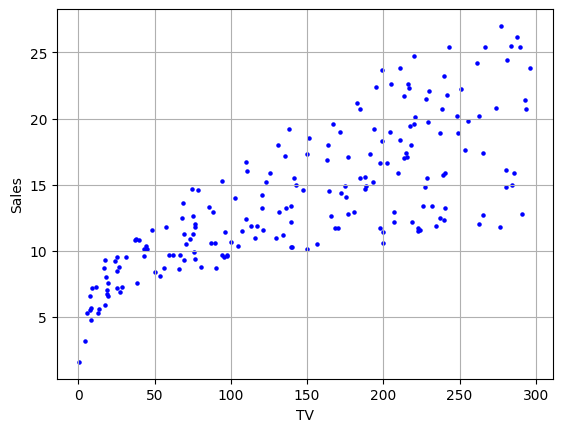

In [12]:
# tv 광고 예산과 판매량과의 관계

fig, ax = plt.subplots()

ax.scatter(tv, sales, s = 5, c = 'blue')

ax.set(xlabel = 'TV',
       ylabel = 'Sales')

plt.grid()
plt.show()

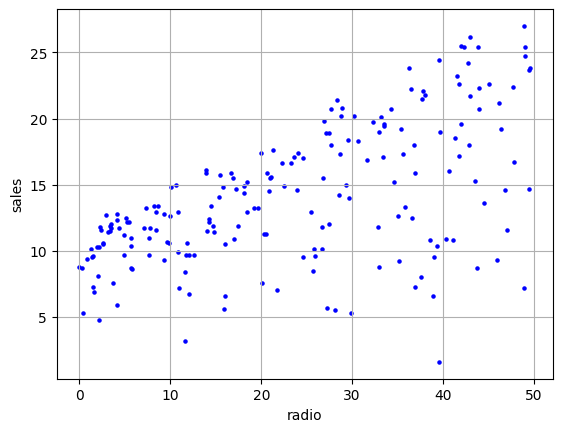

In [13]:
# Radio 광고예산과 판매량과의 관계
fig, ax = plt.subplots()

ax.scatter(radio, sales, s = 5, c = 'blue') # s: 점의 크기, # c: 색

ax.set(xlabel = "radio",
       ylabel = 'sales')

plt.grid()

plt.show()

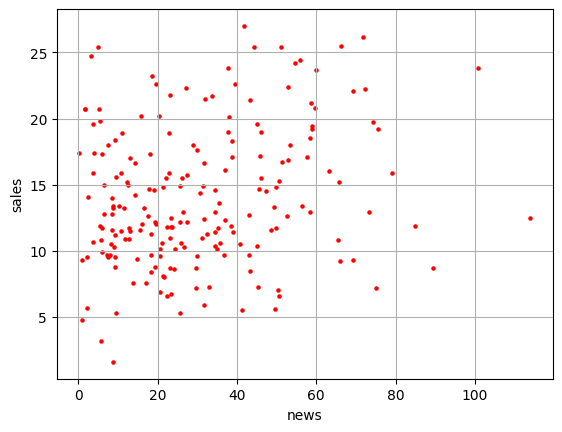

In [14]:
# newspaper 광고예산과 판매량과의 관계
fig, ax = plt.subplots()
ax.scatter(news, sales, s =5, c = 'red')

ax.set(xlabel = 'news',ylabel = 'sales')

plt.grid()
plt.show()

# matplotlib 통계 관련 plot

1-1. hist() 기본 예제

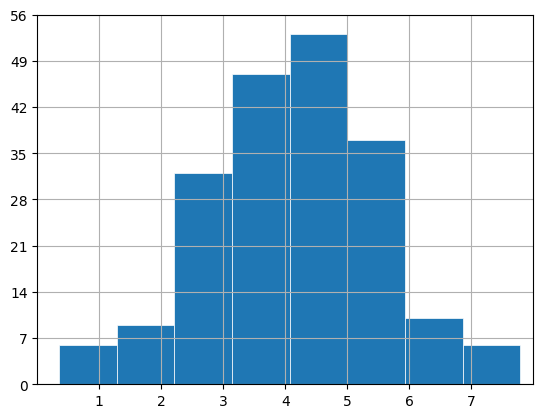

In [15]:
# 데이터 생성
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot
fig, ax = plt.subplots()

ax.hist(x, bins = 8, linewidth = 0.5, edgecolor = 'white')
# bins : histogram의 계급 구간

ax.set(xlim = (0,8), xticks = np.arange(1,8),
       ylim = (0,56), yticks = np.linspace(0,56,9))

plt.grid()

plt.show()

1-2. Advertising data에 적용

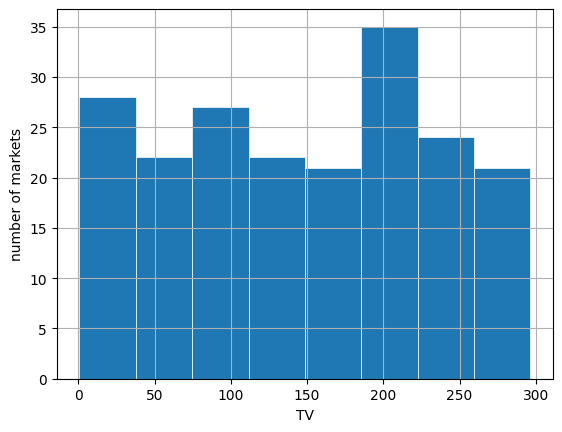

In [16]:
# TV 광고예산의 분포
fig, ax = plt.subplots()

ax.hist(tv, bins = 8, linewidth = 0.5, edgecolor = 'white')

ax.set(xlabel = 'TV', ylabel = 'number of markets')

plt.grid()
plt.show()

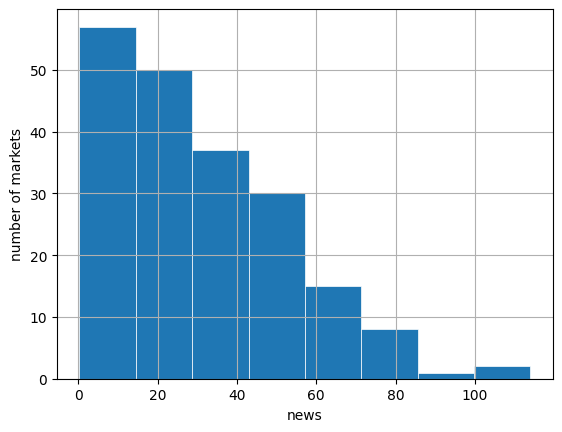

In [17]:
# Newspaper 광고예산의 분포
fig, ax = plt.subplots()

ax.hist(news, bins = 8, linewidth = 0.5, edgecolor = 'white')

ax.set(xlabel = 'news', ylabel = 'number of markets')

plt.grid()
plt.show()

2-1. boxplot() 기본 예제

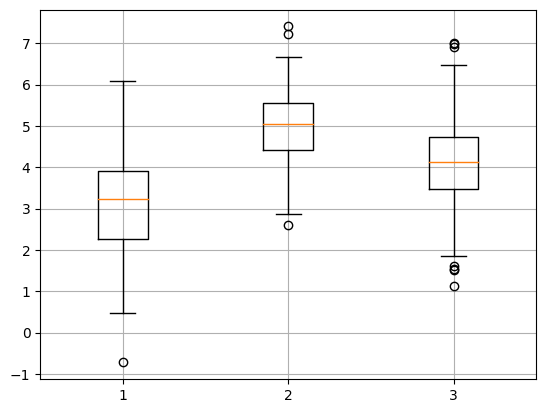

In [18]:
# 데이터 생성
np.random.seed(10)
D = np.random.normal((3,5,4),(1.25,1.00,1.25), (100,3))
# 데이터 총 3개
# 평균이 3, 표준편차 1.25
# (100,3) : 100개의 샘플과 3개의 특성을 가짐

# plot
fig, ax = plt.subplots()
ax.boxplot(D)

plt.grid()
plt.show()

2-2. Advertising data에 적용

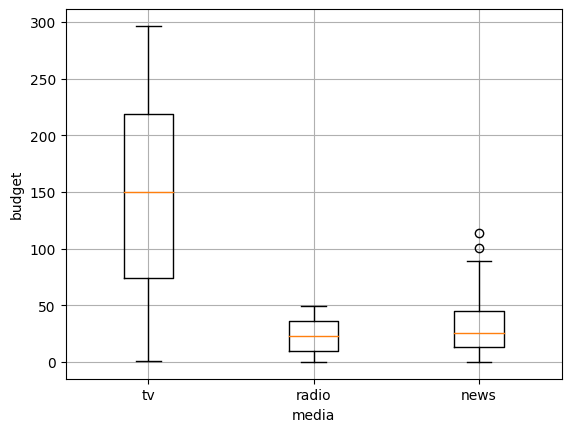

In [19]:
# 3가지 광고 매체의 비교
D = [tv, radio, news]

# plot
fig, ax = plt.subplots()
ax.boxplot(D)

ax.set(xlabel = 'media', ylabel = 'budget')

# plt.xticks()
plt.xticks([1,2,3],['tv','radio','news'])

plt.grid()
plt.show()

# seaborn

In [20]:
import seaborn as sns

1. relplot() - Advertising data
- 두 변수 간의 관계를 시각화하는 방법

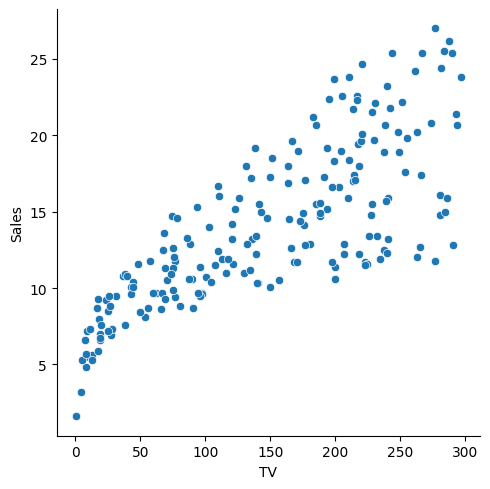

In [21]:
# relation plot
sns.relplot(x=tv, y=sales)

2. PairGrid() - Advertising data
- 변수 쌍에 대한 plot

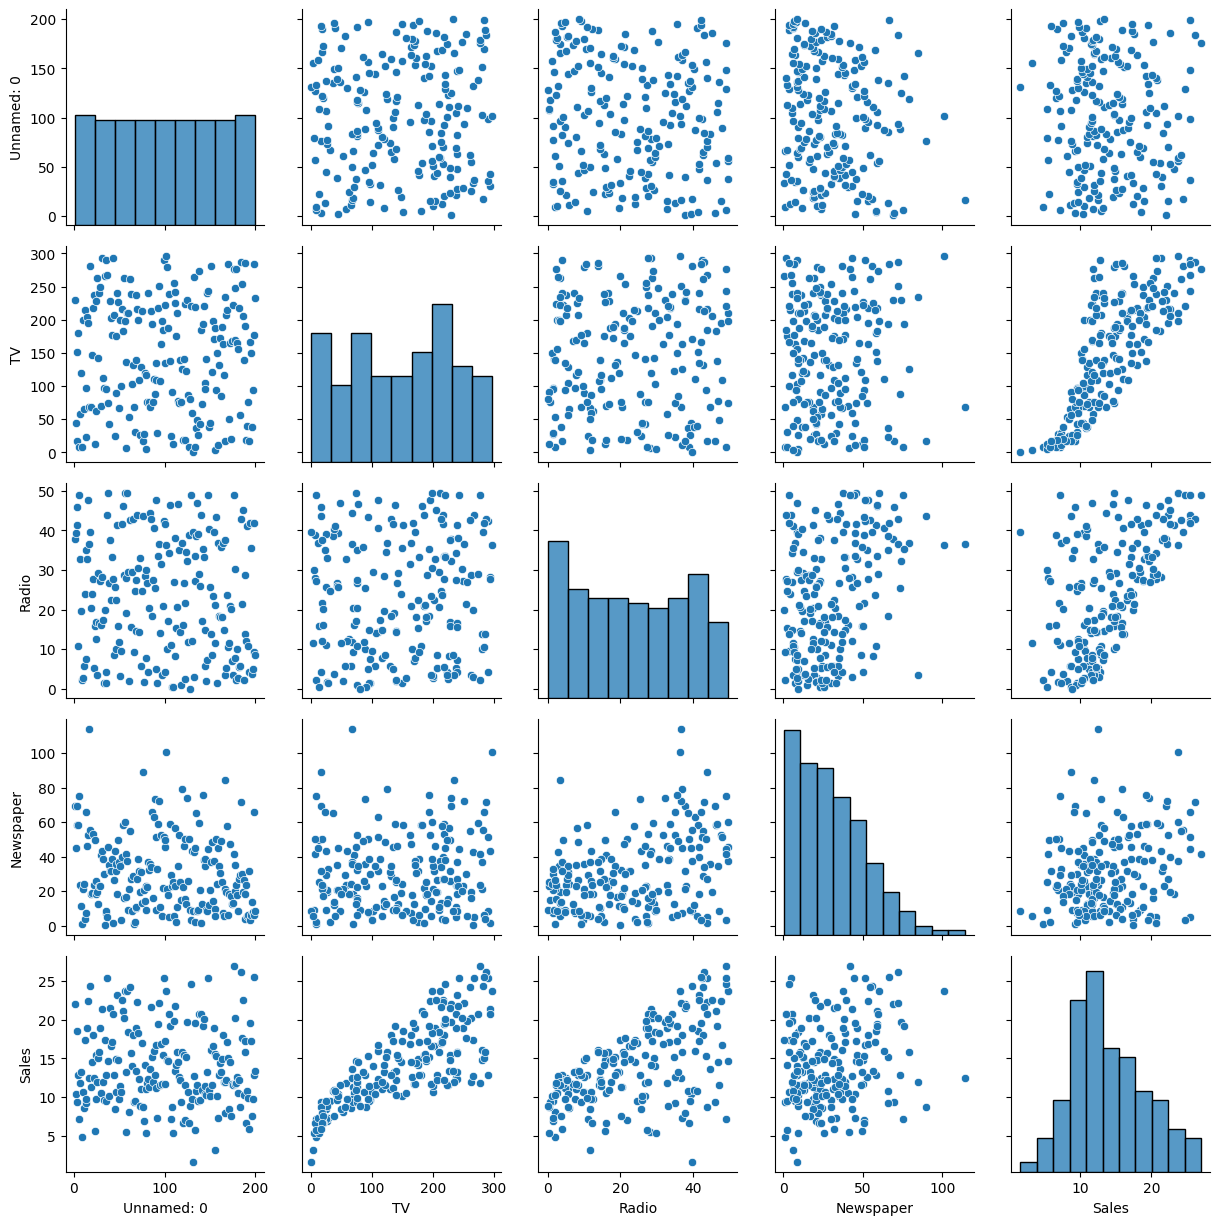

In [22]:
g = sns.PairGrid(ad)  # 여러 개의 변수를 하나로 표현
g.map_diag(sns.histplot)  # 대각선에는 histoplot 보여주기
g.map_offdiag(sns.scatterplot)  # 나머지는 scatter plot으로 보여주기

3. regression line - Advertising data

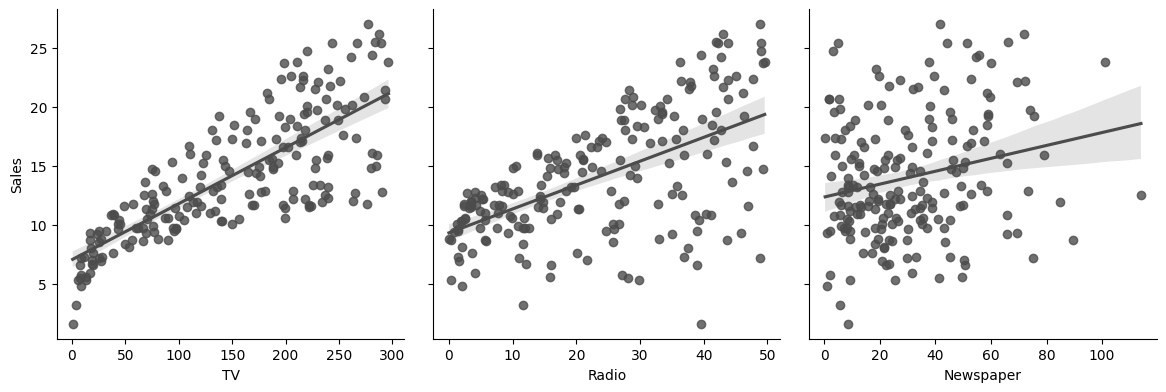

In [24]:
g = sns.PairGrid(ad, y_vars=["Sales"], x_vars=["TV", "Radio", "Newspaper"], height=4)
# y_vars=["Sales"]: y축에 사용할 변수 목록.
# x_vars와 y_vars 매개변수를 사용하여 x축과 y축에 사용할 변수를 명확하게 지정
g.map(sns.regplot, color=".3")  #regplot